<a href="https://colab.research.google.com/github/bhavik-knight/food-order-analysis/blob/main/FoodOrderAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis on New York City Restaurants

In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# reference: https://plotly.com/python/pie-charts/
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

## Data Loading

### task 1
---
 Load the dataset: food_order.csv


In [2]:
uploaded = files.upload()

Saving food_order.csv to food_order.csv


In [4]:
df_nyc = pd.read_csv("food_order.csv")

### task 2
---
Display first 10 rows

In [5]:
df_nyc.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


## Data Description

### task 3
---
Identify the data types for each feature

In [7]:
df_nyc.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

### task4
---
Calculate null-rate of each column

In [43]:
# task4: calculate `null rate` for reach column
# reference: https://medium.com/geekculture/is-there-any-distinction-between-isnull-and-isna-method-of-pandas-dataframe-47095c16f026#:~:text=Distinction%20Between%20isna()%20and,an%20alias%20for%20isna()%20.
# check for NA, null, nan etc values
# turn on flag to detect for inf
pd.options.mode.use_inf_as_na = True
data = df_nyc.isna().sum()

In [38]:
def get_null_rate(col_name: str, df: pd.DataFrame = df_nyc):
    return df[col_name].isna().sum() * 100 / len(df[col_name])

null_rates = dict(zip(df_nyc.columns, map(get_null_rate, df_nyc.columns)))
df_null_rate = pd.DataFrame(data=null_rates, index=["null_rate"])
display(df_null_rate)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
null_rate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### task5
---
Number of unique values for each column

In [42]:
df_nyc.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

# Data Manipulation

### task 6
---
add a column named `total_time` which is total of food preparation & delivery time


In [44]:
df_nyc["total_time"] = df_nyc["food_preparation_time"] + df_nyc["delivery_time"]
display(df_nyc)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,54


## Statistics

### task 7
---
list differnet cuisine types

In [78]:
df_nyc["cuisine_type"].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

### task 8
---
list number of restaurants per cuisine type

In [135]:
# reference1: https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/
# reference2: https://towardsdatascience.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5
restaurants_groupby_cuisine_type = df_nyc.groupby("cuisine_type")
restaurants_by_cuisine_type =\
    restaurants_groupby_cuisine_type\
        .nunique()["restaurant_name"]\
        .reset_index()\
        .rename(columns={"restaurant_name": "number_of_restaurants"})

display(restaurants_by_cuisine_type)

,cuisine_type,number_of_restaurants
0,American,41
1,Chinese,16
2,French,3
3,Indian,14
4,Italian,31
5,Japanese,29
6,Korean,5
7,Mediterranean,5
8,Mexican,11
9,Middle Eastern,7


## Visualization

### task 9A
---
using results from task 8, and using a pie chart display the count of restaurants per cuisine type

---
- to be honest, pie chart is not the ideal choice to plot part-a
- in the real world, I would plot part-a with bar-chart horizontally in decresing order for asthetics
- however, part-b is okay with pie-chart having to only show top 5

In [58]:
# store data in dictionary to give asthetics to pie chart later
# for asthetic purpose I would sort according to the number of restaurants per cuisine in descending order
# reference: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
# data_dict = dict(sorted(restaurants_by_cuisine_types.items(), key=lambda e: -e[1]))
# well, there is an easier way to sort this in pandas
df_data = restaurants_by_cuisine_type.sort_values(by=["number_of_restaurants"], ascending=False)

# for asthetics of the pie chart
# reference : https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
labels = df_data["cuisine_type"]
data = df_data["number_of_restaurants"]
# colors = ("Violet", "indigo", "blue", "green", "yellow", "orange", "red")
explode = [0.01 * i for i in range(len(data))]

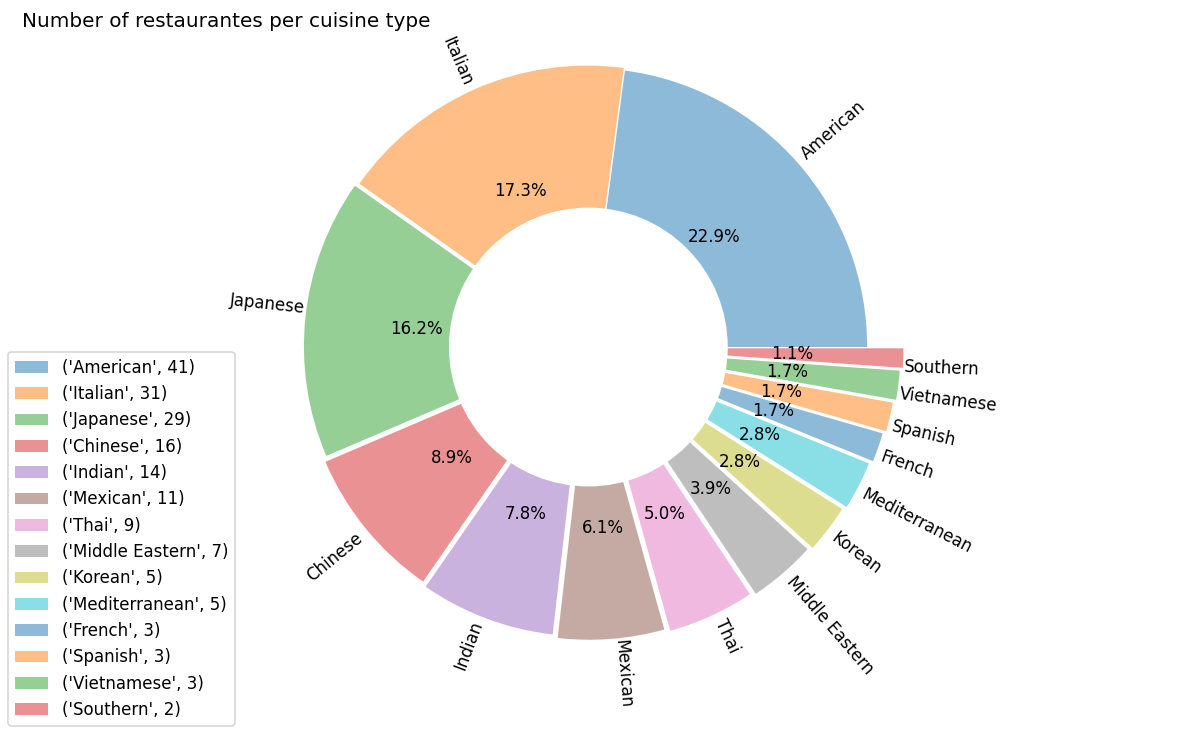

In [71]:
# plotting commands
# set figure size: https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib
figure = plt.figure(figsize = (10, 6), dpi=120)
plot = plt.subplot()
plot.pie(
    x = data,
    labels = labels,
    autopct = "%1.1f%%",
    rotatelabels = True,
    labeldistance = 1,
    explode = explode,
    wedgeprops = {"alpha" : 0.5},
)

# draw circle at the center
center_circle = plt.Circle((0, 0), radius = 0.5, fc="white")
figure = plt.gcf()
figure.gca().add_artist(center_circle)

# to put legends with number of restaurants
legends_labels = dict(zip(labels, data))

# for equal aspect ratio, so that it doens't become ellipse and stay circle
plot.axis("equal")
plt.tight_layout()
figure.legend(legends_labels.items(), loc="lower left")
plt.title("Number of restaurantes per cuisine type", loc="left")
plt.show()

- another way of plotting it with plotly that shows interactive plots
- however, I am new to plotly so I don't know all the cool stuff plotly can do

In [72]:
fig = go.Figure(data = [
        go.Pie(
            values = data,
            labels = labels,
            hole = 0.5,
            pull = explode,
        )
    ])

fig.update_layout(title_text="restaurants by cuisine type")
fig.show()

### task 9B
---
show only the 5 cuisine types with most restaurants

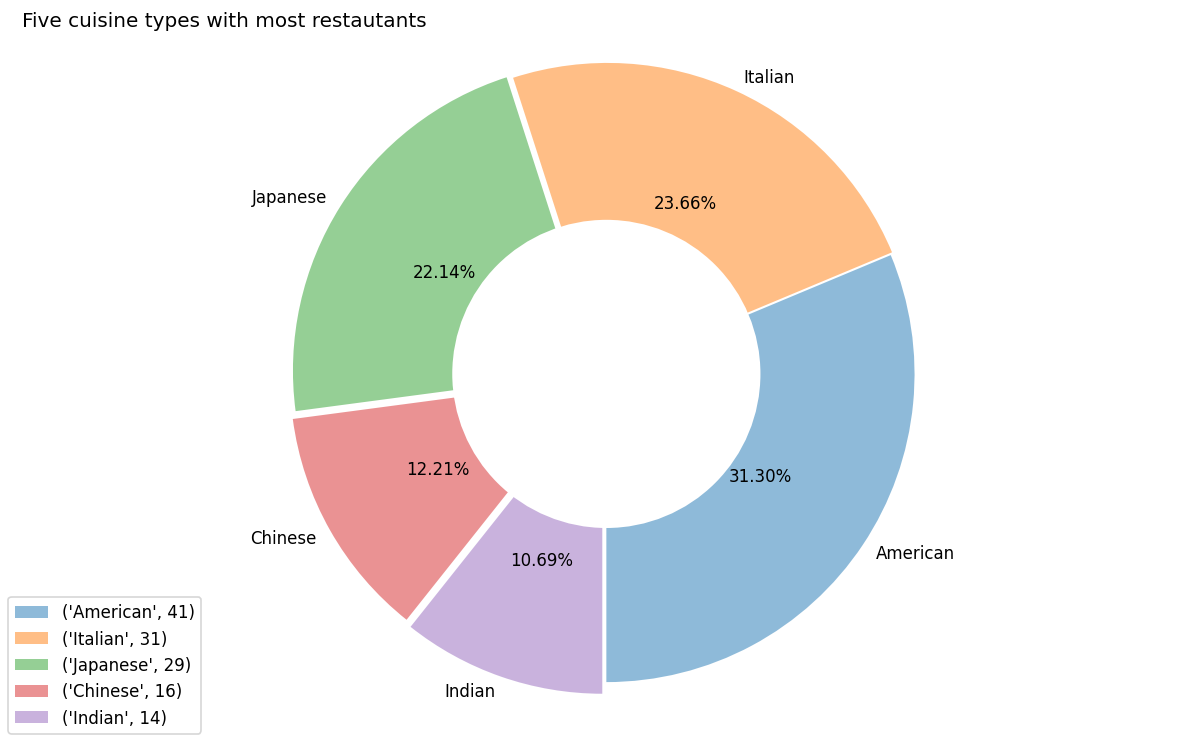

In [74]:
top_data = data[:5]
top_labels = labels[:5]
top_explode = explode[:5]

figure = plt.figure(figsize=(10, 6), dpi=120)
plot = plt.subplot()
plot.pie(
    x = top_data,
    labels = top_labels,
    labeldistance = 1.05,
    autopct = "%1.2f%%",
    explode = top_explode,
    startangle = -90,
    wedgeprops = {"alpha" : 0.5},
)

# draw circle at the center
center_circle = plt.Circle((0, 0), radius = 0.5, fc="white")
figure = plt.gcf()
figure.gca().add_artist(center_circle)

# legend labels
top_legend_labels = dict(zip(top_labels, top_data))

# for equal aspect ratio, so that it doens't become ellipse and stay circle
plot.axis("equal")
plt.tight_layout()
figure.legend(top_legend_labels.items(), loc="lower left")
plt.title("Five cuisine types with most restautants", loc="left")
plt.show()

### task10 A, B
- 10 most popular restaurant name
- highlight the top 3
---

- there are only `178 unique restaurant names` according to the previous results.
- the ratings have "Not given" (which I am going to discard for the analysis), also convert type from string to numeric.
- for the analysis, *dropping **Not given** makes sense*, because some people may just not give ratings
- rating the restaurant `0 for "Not given"` does **not** make sense if they're good restaurants as it would bring the ratings down
- the decision is *not to use "Not given" ratings* at all, and drop them for the fair analysis

In [75]:
# preprocessing for the plotting
# leave original datafram intact, make a copy and update ratings there
from copy import deepcopy
df_nyc_updated = deepcopy(df_nyc)

# ratings are in string -> convert to int (i decided not to convert "not given to 0")
# reference: https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# reference: https://datatofish.com/string-to-integer-dataframe/
# reference: https://datatofish.com/dropna/
df_nyc_updated["rating"] = pd.to_numeric(df_nyc_updated["rating"], errors="coerce")
df_nyc_ratings = df_nyc_updated.dropna()

#### preprocessing for task10

---


Idea is to find average (arithmatic mean) ratings, and how many times they have been given a rating for each of this `178` distinct restaurant names to check the popularity.<br><br>

- The restaurant with 5 ratings does **not** necessarily means they are popular if they are rated only once and got 5.0 ratings, compare to other restaurants which may have 4.7 ratings but they were rated say 10 times.
- Indeed, after preparation of the data I see that there are restaurants have been rated more than 10 times. More you're rated more trusted ratings is.
- That is why for this particular task, I am going to take weighted rating as the measure of popularity compared to the average ratings.
- In cases of ties (say restaurants weighted rating was a tie), the restaurant rated less number of times wins the tie
---
- for example: restaurant `A, B, C` all have reached `120` weighted ratings
    - restaurant `A`: number of ratings: `24` and average rating is `5`
    - restaurant `B`: number of ratings: `30` and average rating is `4`
    - restaurant `C`: number of ratings: `40` and average rating is `3`
    - restaurant `D`: number of ratings: `10` and average rating is `5`
---

in this scenario, most popular restaurant would be `restaurant A` having `120 weighted rating`, but then 2nd best won't be `restaurant D` having average `5` rating, because it has been voted significantly less time compared to others. There are so many restaurant rated `5` but only rated once in our dataset. So neither `avarage rating` nor `number of ratings` are the correct metric for most popular restaurants according to me.

---

Also, once weighted ratings are equal; the restaurant with least number of ratings to reach that weighted ratings wins, not the restaurant that has been rated most number of times. Like `restaurant C` in above example has been rated `40` times to achieve that rating comapred to `restaurant A` which needed to be rated only `24` times; means it's more popular.

In [83]:
# grouping by restaurant names
restaurants_groupby_name = df_nyc_ratings.groupby("restaurant_name")

# taking the counts and mean of ratings to check the most popular after grouping, round upto 1 decimal for the ratings
# rename columns to give appropriate names after grouping
# reference: https://stackoverflow.com/questions/45959065/pandas-groupby-agg-to-return-with-a-given-column-name
# sort in the descending order in the number of counts, and if counts are tied use mean as tie-breaker
# reset index for new dataset
# reference: https://stackoverflow.com/questions/31569549/how-to-groupby-a-dataframe-in-pandas-and-keep-columns
popular_restaurants = \
    restaurants_groupby_name["rating"]\
    .agg(["count", "sum", "mean"]).round(1)\
    .sort_values(by=["sum", "count", "mean"], ascending=[False, True, False])\
    .reset_index()\
    .rename(columns={"count": "number_of_ratings", "sum":"weighted_rating", "mean": "mean_rating"})

display(popular_restaurants)

,restaurant_name,number_of_ratings,weighted_rating,mean_rating
0,Shake Shack,133,569.0,4.3
1,The Meatball Shop,84,379.0,4.5
2,Blue Ribbon Sushi,73,308.0,4.2
3,Blue Ribbon Fried Chicken,64,277.0,4.3
4,RedFarm Broadway,41,174.0,4.2
...,...,...,...,...
151,Pepe Giallo,1,3.0,3.0
152,Sarabeth's West,1,3.0,3.0
153,Sushi Choshi,1,3.0,3.0
154,Woorijip,1,3.0,3.0


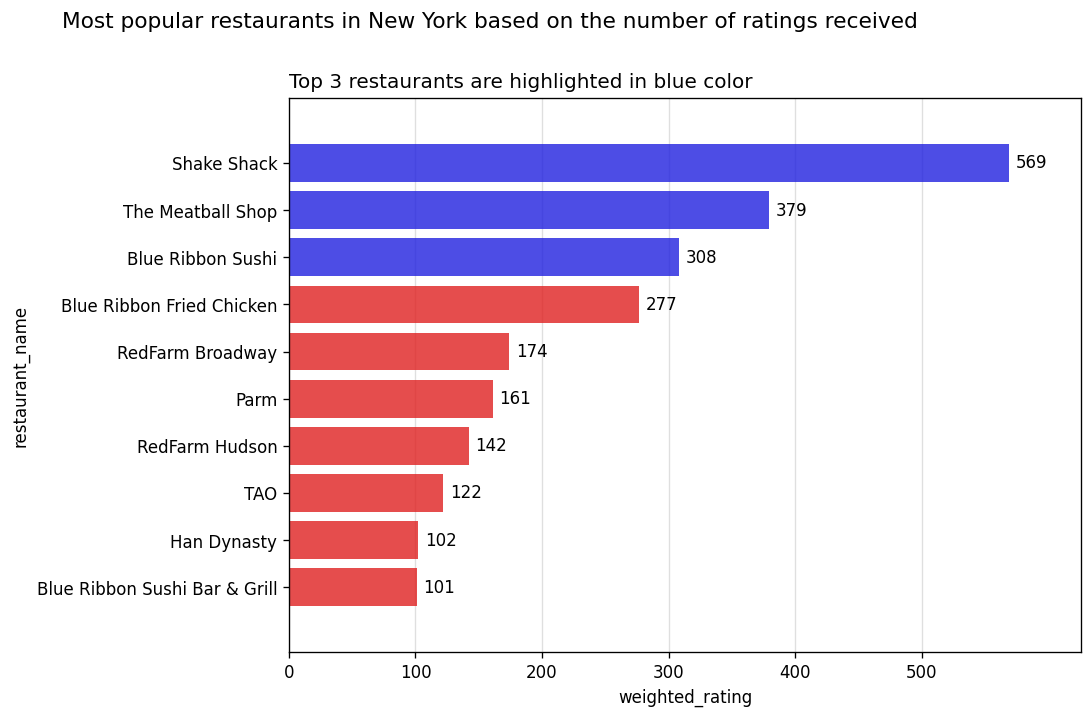

In [267]:
# task 10a: top10, task 10b: highlight top3 in different color
# top10 most popular
top = 10
most_popular = popular_restaurants[:top]

# display top_n (3) in different color
top_n = 3

# reference: https://stackoverflow.com/questions/31074758/how-to-set-a-different-color-to-the-largest-bar-in-a-seaborn-barplot
# reference: https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
# set the color list to be passed to palette
colors = ["blue"] * top_n + ["red"] * (top - top_n)


# draw only 1 plot here
figure, plot = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 6), dpi=120)

# draw bar plot with seabourn library
sns.barplot(
    data = most_popular,
    x = most_popular["weighted_rating"],
    y = most_popular["restaurant_name"],
    palette = colors,
    alpha = 0.8,
    ax = plot, #  in case of multiple plots, this will decide which plot is this
)

# give labels to the bars
# reference: https://stackoverflow.com/questions/70834782/how-to-increase-the-spacing-between-bar-plot-and-bar-labels
plt.bar_label(plot.containers[0], padding=4)

# set the title for the plot
plot.set_title("Top 3 restaurants are highlighted in blue color", loc="left")
figure.suptitle(
    "Most popular restaurants in New York based on the number of ratings received",
    fontsize=13, x = 0.35, y = 1
)

# set margin around the axis
plot.margins(x = 0.1, y = 0.1)

# image aspect ratio
plot.set_box_aspect(0.7)

# set the grid
plot.grid(axis="x", linestyle="-", alpha=0.4)

# start, stop, step
# to calculate stop get the max weighted ratings and round it to nearst hundred
from math import ceil
stop = ceil(most_popular["weighted_rating"][0] / 100) * 100
grid_x_ticks = np.arange(0, stop, 100)
plot.set_xticks(grid_x_ticks)
# make the gridlines pass beneath the bar
plot.set_axisbelow(True)

# to show the plot
plt.show()

### task 11
---
plot top 10 restaurants for each cuisine type and hightlight top 3

In [182]:
# preprocessing for this task
# group retaurants by "cuisine_type"; use the data-frame without "Not given" ratings
# because this will be similar to task 10, after doing above step, we want to group by "restaurant_name"
# that is why it makes sense to do it in the one step

restaurants_groupby_cuisine_type = df_nyc_ratings.groupby(["cuisine_type", "restaurant_name"])

restaurants_by_cuisine_type = \
    restaurants_groupby_cuisine_type["rating"]\
    .agg(["count", "sum", "mean"]).round(1)\
    .reset_index()\
    .sort_values(by=["sum", "count", "mean"], ascending=[False, True, False])\
    .rename(columns={"count": "number_of_ratings", "sum": "weighted_rating", "mean": "mean_rating"})

display(restaurants_by_cuisine_type)

,cuisine_type,restaurant_name,number_of_ratings,weighted_rating,mean_rating
31,American,Shake Shack,133,569.0,4.3
83,Italian,The Meatball Shop,70,317.0,4.5
91,Japanese,Blue Ribbon Sushi,73,308.0,4.2
6,American,Blue Ribbon Fried Chicken,64,277.0,4.3
46,Chinese,RedFarm Broadway,41,174.0,4.2
...,...,...,...,...,...
78,Italian,Pepe Giallo,1,3.0,3.0
106,Japanese,Sushi Choshi,1,3.0,3.0
120,Korean,Woorijip,1,3.0,3.0
138,Middle Eastern,Byblos Restaurant,1,3.0,3.0


In [218]:
# reference: https://realpython.com/pandas-groupby/
# after fetching top10 of each cuisine type: it didn't maintain the grouping as I wanted, so grouping it again according to cuisine type
most_popular_restaurants_by_cuisine_type = \
    restaurants_by_cuisine_type\
        .groupby("cuisine_type")\
        .head(10)\
        .groupby("cuisine_type")

<ipython-input-268-2ec79bbd2850>:39: UserWarning:

Glyph 142 (\x8e) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 142 (\x8e) missing from current font.



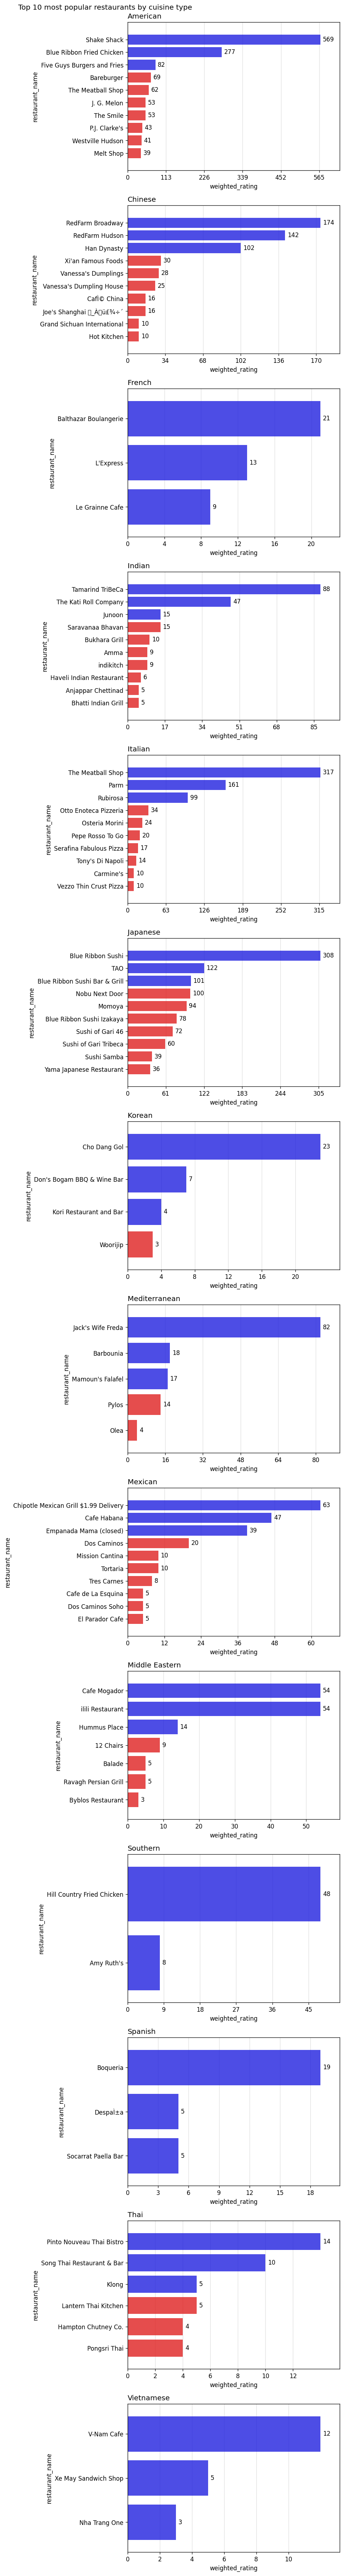

In [268]:
# asthertic - labels, title, margin, figure size, etc
# reference: https://stackoverflow.com/questions/67112449/bar-labels-in-matplotlib-seaborn
from math import ceil
figure, plots = plt.subplots(nrows=most_popular_restaurants_by_cuisine_type.ngroups, ncols=1, figsize=(10, 60), dpi=120)

for index, cuisine_type in enumerate(most_popular_restaurants_by_cuisine_type.groups):
    restaurants_data = most_popular_restaurants_by_cuisine_type.get_group(cuisine_type)

    sns.barplot(
        data = restaurants_data,
        x = restaurants_data["weighted_rating"],
        y = restaurants_data["restaurant_name"],
        ax = plots[index],
        width = 0.8,
        alpha = 0.8,
        palette = ["blue"] * min(3, len(restaurants_data)) + \
            ["red"] * max(0, len(restaurants_data) - min(3, len(restaurants_data)))
    )

    for label in plots[index].containers:
        plots[index].bar_label(label, padding=4)

    plots[index].margins(x = 0.1, y = 0.1)
    plots[index].set_box_aspect(0.7)
    plots[index].set_title(cuisine_type, loc="left")

    # set the grid
    plots[index].grid(axis="x", linestyle="-", alpha=0.4)
    # print(f'--{restaurants_data["weighted_rating"].iloc[0]}')
    # start, stop, step
    # to calculate stop get the max weighted ratings and round it to nearst hundred
    stop = restaurants_data["weighted_rating"].iloc[0]
    division = stop // 5
    grid_x_ticks = np.arange(0, stop, division)
    plots[index].set_xticks(grid_x_ticks)
    # make the gridlines pass beneath the bar
    plots[index].set_axisbelow(True)

figure.tight_layout()
figure.suptitle("Top 10 most popular restaurants by cuisine type", x = 0.25, y = 1.001)
plt.show()

#### task 12
---
```
a. What is the proportion of reviews for Shake Shack?
    rating distribution of the Shack Shack restaurant
b. Use a pie chart to display your results
```

In [257]:
# a: shake_shack_proportion
shake_shack_ratings_group = df_nyc[df_nyc["restaurant_name"] == "Shake Shack"].groupby("rating")
shake_shack_ratings_distribution = shake_shack_ratings_group["rating"]\
        .agg(["count"])\
        .reset_index()

display(shake_shack_ratings_distribution)

,rating,count
0,3,23
1,4,50
2,5,60
3,Not given,86


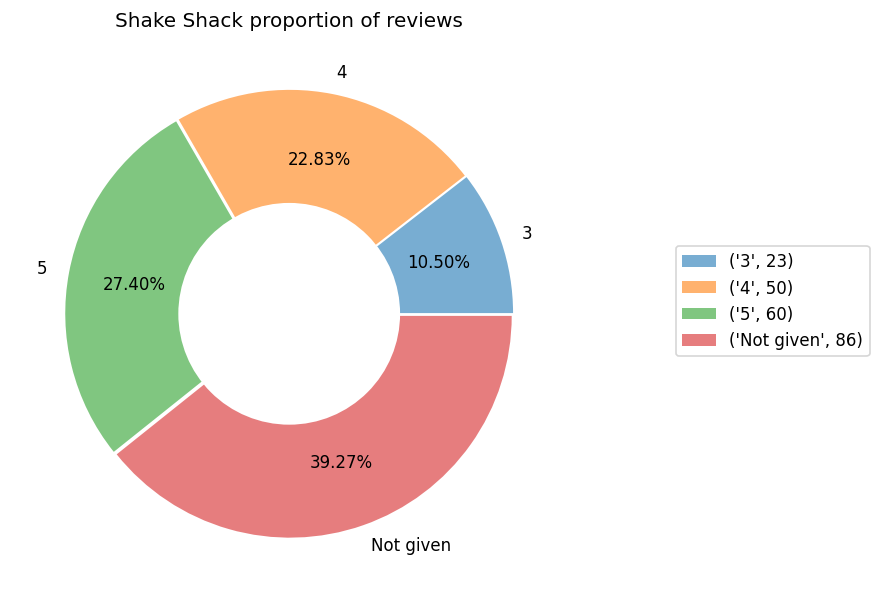

In [266]:
# preprocessing for plots
legend_dict = dict(zip(shake_shack_ratings_distribution["rating"], shake_shack_ratings_distribution["count"]))
num_rows = len(shake_shack_ratings_distribution)
explode = [0.01] * num_rows


figure = plt.figure(figsize = (10, 6), dpi=120)
plt.pie(
    x = shake_shack_ratings_distribution["count"],
    labels = shake_shack_ratings_distribution["rating"],
    labeldistance = 1.1,
    explode = explode,
    autopct = "%1.2f%%",
    pctdistance = 0.7,
    wedgeprops = {"alpha" : 0.6}
)

# draw circle at the center
center_circle = plt.Circle((0, 0), radius = 0.5, fc="white")
figure = plt.gcf()
figure.gca().add_artist(center_circle)

plt.title("Shake Shack proportion of reviews")

figure.legend(legend_dict.items(), loc = "outside right")
plt.show()

### task13
---

> Is there any link between `ratings` and `food_preparation_time`?

---
- Usually we use scatter-plot to find correlation
- Scatterplot is not ideal choice because ratings are caterized into different categories
- Scatterplot is an ideal choice with both continuos variable
- However, for the analysis purpose using it
---
Update:
- adding a boxplot, because I wanted to check min, max, outlines, central tendency for different ratings
- adding a violin plot, to see the distribution aroudn the boxplot, so that I can have idea which time have more number of ratings and how it is affecting the overall ratings
- since scatter plot is not doing a good job for overlapping points, I need to add jitter that randomly add small noise to move points to have better visualization

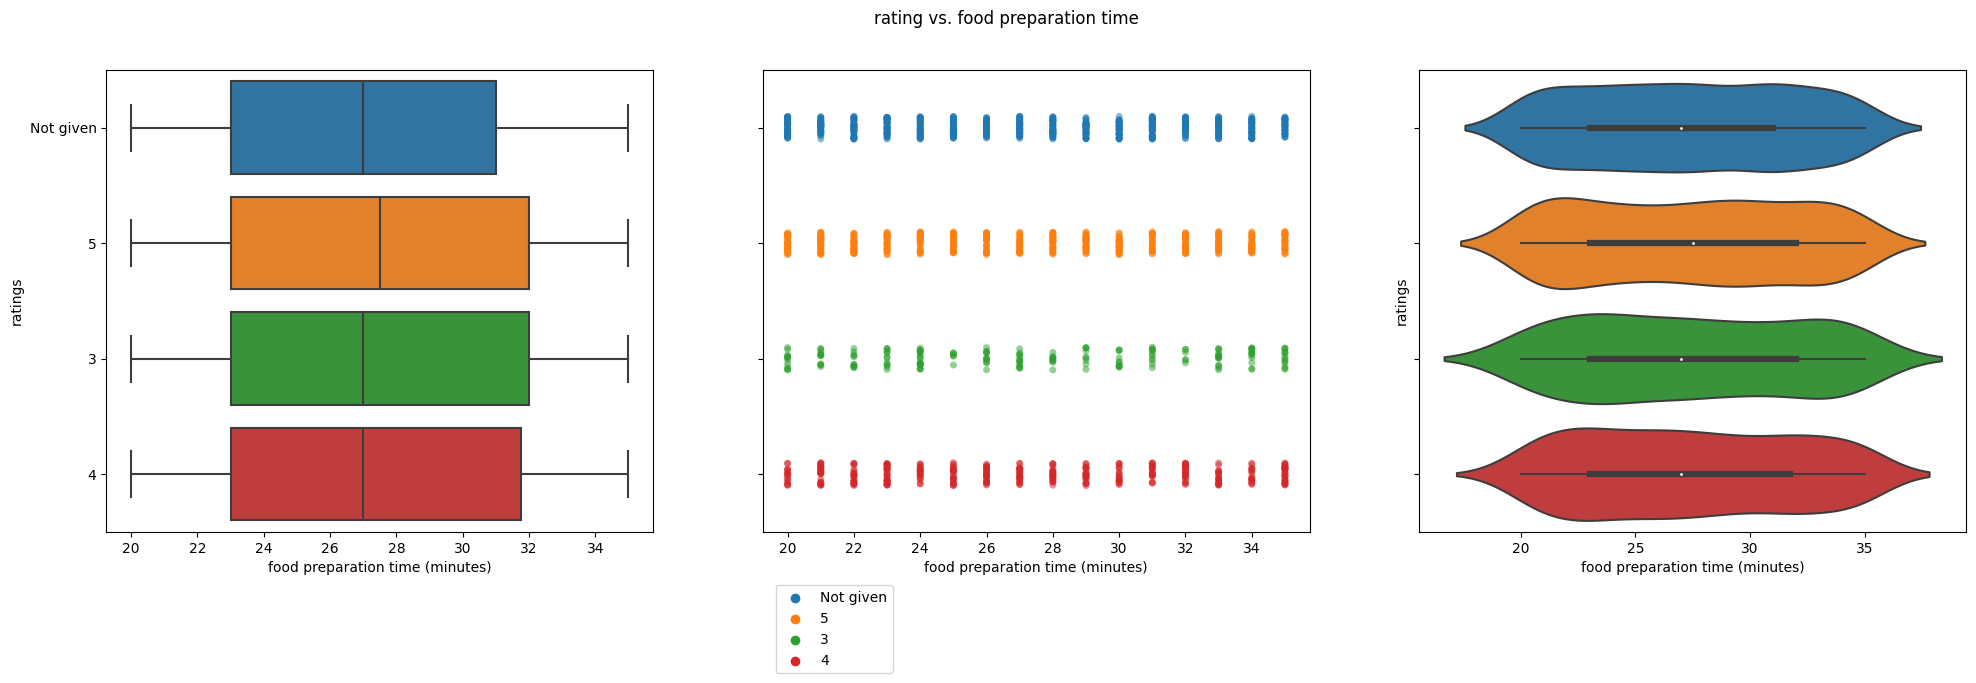

In [262]:
# including the ratings "Not given" this time for analysis
time = df_nyc["food_preparation_time"]
ratings = df_nyc["rating"]
xlabel = "food preparation time (minutes)"
ylabel = "ratings"

figure, axs = plt.subplots(ncols = 3, figsize = (24, 6), sharey=True)

sns.boxplot(
    x = time,
    y = ratings,
    ax = axs[0],
)

sns.stripplot(
    x = time,
    y = ratings,
    hue = ratings,
    ax = axs[1],
    alpha = 0.5,
)

sns.violinplot(
    x = time,
    y = ratings,
    ax = axs[2],
)

axs[1].legend(bbox_to_anchor = (0.25, -0.1))
figure.suptitle("rating vs. food preparation time")
for plot in axs:
    plot.set(xlabel = xlabel, ylabel = ylabel)

plt.show()

- above results suggests that for any ratings (Not given, 3, 4, 5) the food-preparation time does not affect the ratings
- because as the food preparation time increses, I see the rating is not decreasing as I hoped would be the case here
- for longer preparation time say 34 minutes, all kind of ratings are given, similar for the less preparation time say 20 minutes
- this result shows that food_processing_time is not affecting rating and they are not linked.
- doing further analysis to support my findings like getting correlation coefficient.

In [263]:
from scipy.stats import pearsonr
r_value, p_value = pearsonr(df_nyc_ratings["rating"], df_nyc_ratings["food_preparation_time"])
print(f"Pearson correlation (r): {r_value: .4f}")
print(f"P-value: {p_value: .4f}")

Pearson correlation (r): -0.0061
P-value:  0.8359


- The person correlation coffeficient is -0.0061
- The p_value is 0.8359.
> The p-value is significant large; so we do not reject the null hypothesis.
- From above two evidences (visualization and the calculated value), I conclude that there is no link (no correlation) between rating and food_preparation_time for the given data-set.
- However, there could be some other variable affecting the results. like delivery time or total time. But both are showing the similar results as above.

In [264]:
# with delivery time
r_value, p_value = pearsonr(df_nyc_ratings["rating"], df_nyc_ratings["delivery_time"])
print(f"Pearson correlation (r): {r_value: .4f}")
print(f"P-value: {p_value: .4f}")

Pearson correlation (r): -0.0098
P-value:  0.7385


In [265]:
# with total time
r_value, p_value = pearsonr(df_nyc_ratings["rating"], df_nyc_ratings["total_time"])
print(f"Pearson correlation (r): {r_value: .4f}")
print(f"P-value: {p_value: .4f}")

Pearson correlation (r): -0.0113
P-value:  0.6992
